In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from cpp_soft_info import get_KDEs
from Scratch import load_calibration_memory
from result_saver import SaverProvider

provider = SaverProvider()
all_memories = load_calibration_memory(provider, tobecalib_backend='ibm_sherbrooke', other_date='2021-10-30')

import pickle 
with open('all_memories.pkl', 'wb') as f:
    pickle.dump(all_memories, f)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.


In [3]:
print(all_memories[0]['mmr_0'].shape)

(10000,)


In [27]:
import numpy as np

import pickle
from cpp_soft_info import get_KDEs

with open('all_memories.pkl', 'rb') as f:
    all_memories = pickle.load(f)

bandwiths = np.linspace(0.05, 0.9, 20)
# bandwiths = [0.1, 0.6]
# bandwiths = [0.4]*127
kde_dict = get_KDEs(all_memories, bandwiths, relError=-1, absError=-1, num_points=51)

In [28]:
for i in range(127):
    print(i, kde_dict[i].bestBandwidth)

0 0.22894736842105262
1 0.36315789473684207
2 0.22894736842105262
3 0.2736842105263158
4 0.36315789473684207
5 0.40789473684210525
6 0.36315789473684207
7 0.31842105263157894
8 0.45263157894736844
9 0.36315789473684207
10 0.36315789473684207
11 0.1842105263157895
12 0.2736842105263158
13 0.22894736842105262
14 0.1842105263157895
15 0.31842105263157894
16 0.45263157894736844
17 0.1842105263157895
18 0.5868421052631579
19 0.49736842105263157
20 0.2736842105263158
21 0.22894736842105262
22 0.40789473684210525
23 0.36315789473684207
24 0.1394736842105263
25 0.22894736842105262
26 0.2736842105263158
27 0.36315789473684207
28 0.1842105263157895
29 0.22894736842105262
30 0.22894736842105262
31 0.2736842105263158
32 0.2736842105263158
33 0.1842105263157895
34 0.49736842105263157
35 0.31842105263157894
36 0.40789473684210525
37 0.22894736842105262
38 0.31842105263157894
39 0.22894736842105262
40 0.22894736842105262
41 0.1842105263157895
42 0.1842105263157895
43 0.45263157894736844
44 0.27368421

In [29]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 30
num_std = 3

grid_dict = generate_grid_and_estimate_density(kde_dict, num_points, num_std)
# grid_dict

Grid generation time: 7.167e-06 seconds
KDE initialization time for qubit 0: 1.792e-06 seconds
KDE evaluation time for qubit 0: 0.0224547 seconds
Conversion to Eigen time for qubit 0: 1.834e-06 seconds
KDE initialization time for qubit 1: 2.125e-06 seconds
KDE evaluation time for qubit 1: 0.0427396 seconds
Conversion to Eigen time for qubit 1: 2.417e-06 seconds
KDE initialization time for qubit 2: 5.83e-07 seconds
KDE evaluation time for qubit 2: 0.0246854 seconds
Conversion to Eigen time for qubit 2: 1.375e-06 seconds
KDE initialization time for qubit 3: 4.17e-07 seconds
KDE evaluation time for qubit 3: 0.0279108 seconds
Conversion to Eigen time for qubit 3: 1.291e-06 seconds
KDE initialization time for qubit 4: 4.16e-07 seconds
KDE evaluation time for qubit 4: 0.0421019 seconds
Conversion to Eigen time for qubit 4: 2.209e-06 seconds
KDE initialization time for qubit 5: 5e-07 seconds
KDE evaluation time for qubit 5: 0.0499209 seconds
Conversion to Eigen time for qubit 5: 1.666e-06 sec

# Plot the densities

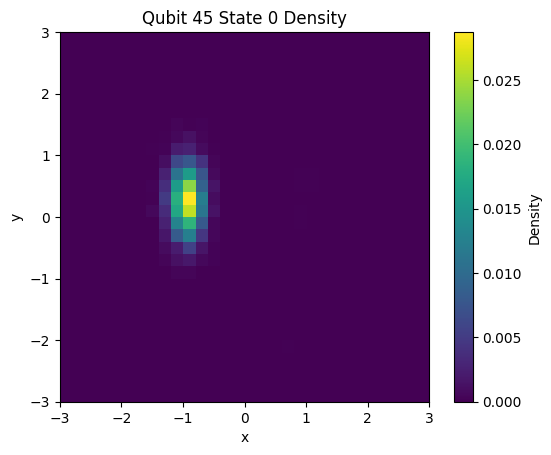

11:15:29 Warning: The following kwargs were not used by contour: 'dpi'. IN FILE: /var/folders/_3/n7zzdff5239886c9gmhrk6yr0000gn/T/ipykernel_3489/1880306534.py, LINE: 20


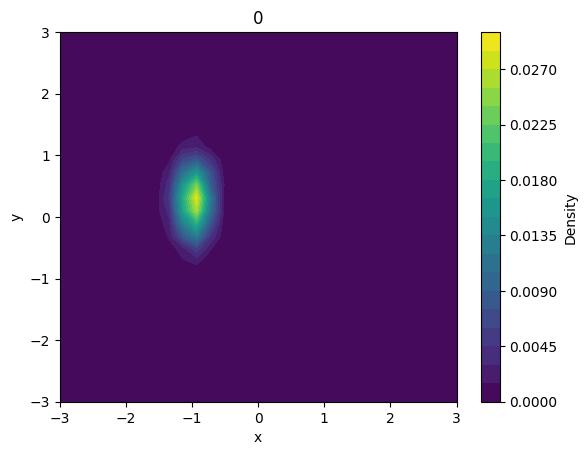

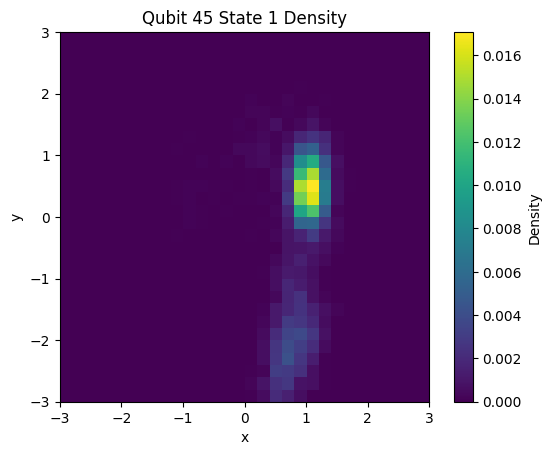

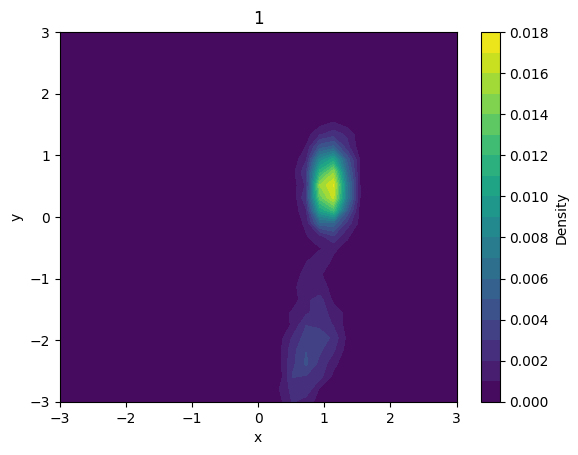

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to reshape and plot density
def plot_density(density, qubit_idx, state):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    plt.imshow(density_reshaped, extent=[-num_std, num_std, -num_std, num_std], origin='lower')
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State {state} Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_density_contour(density, qubit_idx, state, num_points, num_std, levels=20):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density_reshaped, levels=levels, cmap='viridis', dpi=300)  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(state)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Loop through each qubit and plot the densities
for qubit_idx, (density_0, density_1) in grid_dict.items():
    if qubit_idx != 45:
        continue
    plot_density(density_0, qubit_idx, state='0')
    plot_density_contour(density_0, qubit_idx, state='0', num_points=num_points, num_std=num_std)
    plot_density(density_1, qubit_idx, state='1')
    plot_density_contour(density_1, qubit_idx, state='1', num_points=num_points, num_std=num_std)


# Plot IQ data

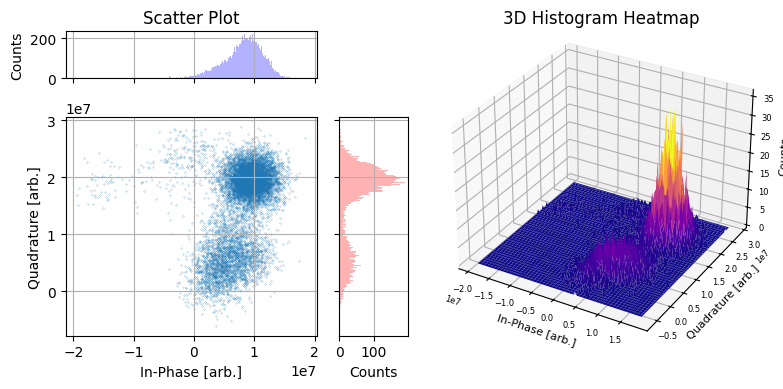

In [31]:
from soft_info import plot_IQ_data

plot_IQ_data(all_memories[45]["mmr_1"])

# relError diff plot:

In [32]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 51
num_std = 3

kde_dict = get_KDEs(all_memories, bandwiths, relError=1, absError=-1)
grid_dict_relErr_1 = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


Grid generation time: 1.9583e-05 seconds
KDE initialization time for qubit 0: 1.834e-06 seconds
KDE evaluation time for qubit 0: 0.0292621 seconds
Conversion to Eigen time for qubit 0: 2.542e-06 seconds
KDE initialization time for qubit 1: 8.959e-06 seconds
KDE evaluation time for qubit 1: 0.0264382 seconds
Conversion to Eigen time for qubit 1: 1.333e-06 seconds
KDE initialization time for qubit 2: 4.958e-06 seconds
KDE evaluation time for qubit 2: 0.0380772 seconds
Conversion to Eigen time for qubit 2: 2.5e-06 seconds
KDE initialization time for qubit 3: 9.25e-06 seconds
KDE evaluation time for qubit 3: 0.0335957 seconds
Conversion to Eigen time for qubit 3: 2.417e-06 seconds
KDE initialization time for qubit 4: 9.708e-06 seconds
KDE evaluation time for qubit 4: 0.0406803 seconds
Conversion to Eigen time for qubit 4: 2.5e-06 seconds
KDE initialization time for qubit 5: 5.75e-06 seconds
KDE evaluation time for qubit 5: 0.0469858 seconds
Conversion to Eigen time for qubit 5: 2.042e-06 s

In [33]:
kde_dict = get_KDEs(all_memories, bandwiths, relError=-1, absError=-1)
grid_dict_relErr_None = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


Grid generation time: 1.6917e-05 seconds
KDE initialization time for qubit 0: 1.667e-06 seconds
KDE evaluation time for qubit 0: 0.0571684 seconds
Conversion to Eigen time for qubit 0: 2.583e-06 seconds
KDE initialization time for qubit 1: 7.625e-06 seconds
KDE evaluation time for qubit 1: 0.111642 seconds
Conversion to Eigen time for qubit 1: 2.875e-06 seconds
KDE initialization time for qubit 2: 9.458e-06 seconds
KDE evaluation time for qubit 2: 0.0634469 seconds
Conversion to Eigen time for qubit 2: 1.833e-06 seconds
KDE initialization time for qubit 3: 7.542e-06 seconds
KDE evaluation time for qubit 3: 0.0715545 seconds
Conversion to Eigen time for qubit 3: 1.292e-06 seconds
KDE initialization time for qubit 4: 4.292e-06 seconds
KDE evaluation time for qubit 4: 0.111916 seconds
Conversion to Eigen time for qubit 4: 2.833e-06 seconds
KDE initialization time for qubit 5: 9.333e-06 seconds
KDE evaluation time for qubit 5: 0.135302 seconds
Conversion to Eigen time for qubit 5: 2.791e-0

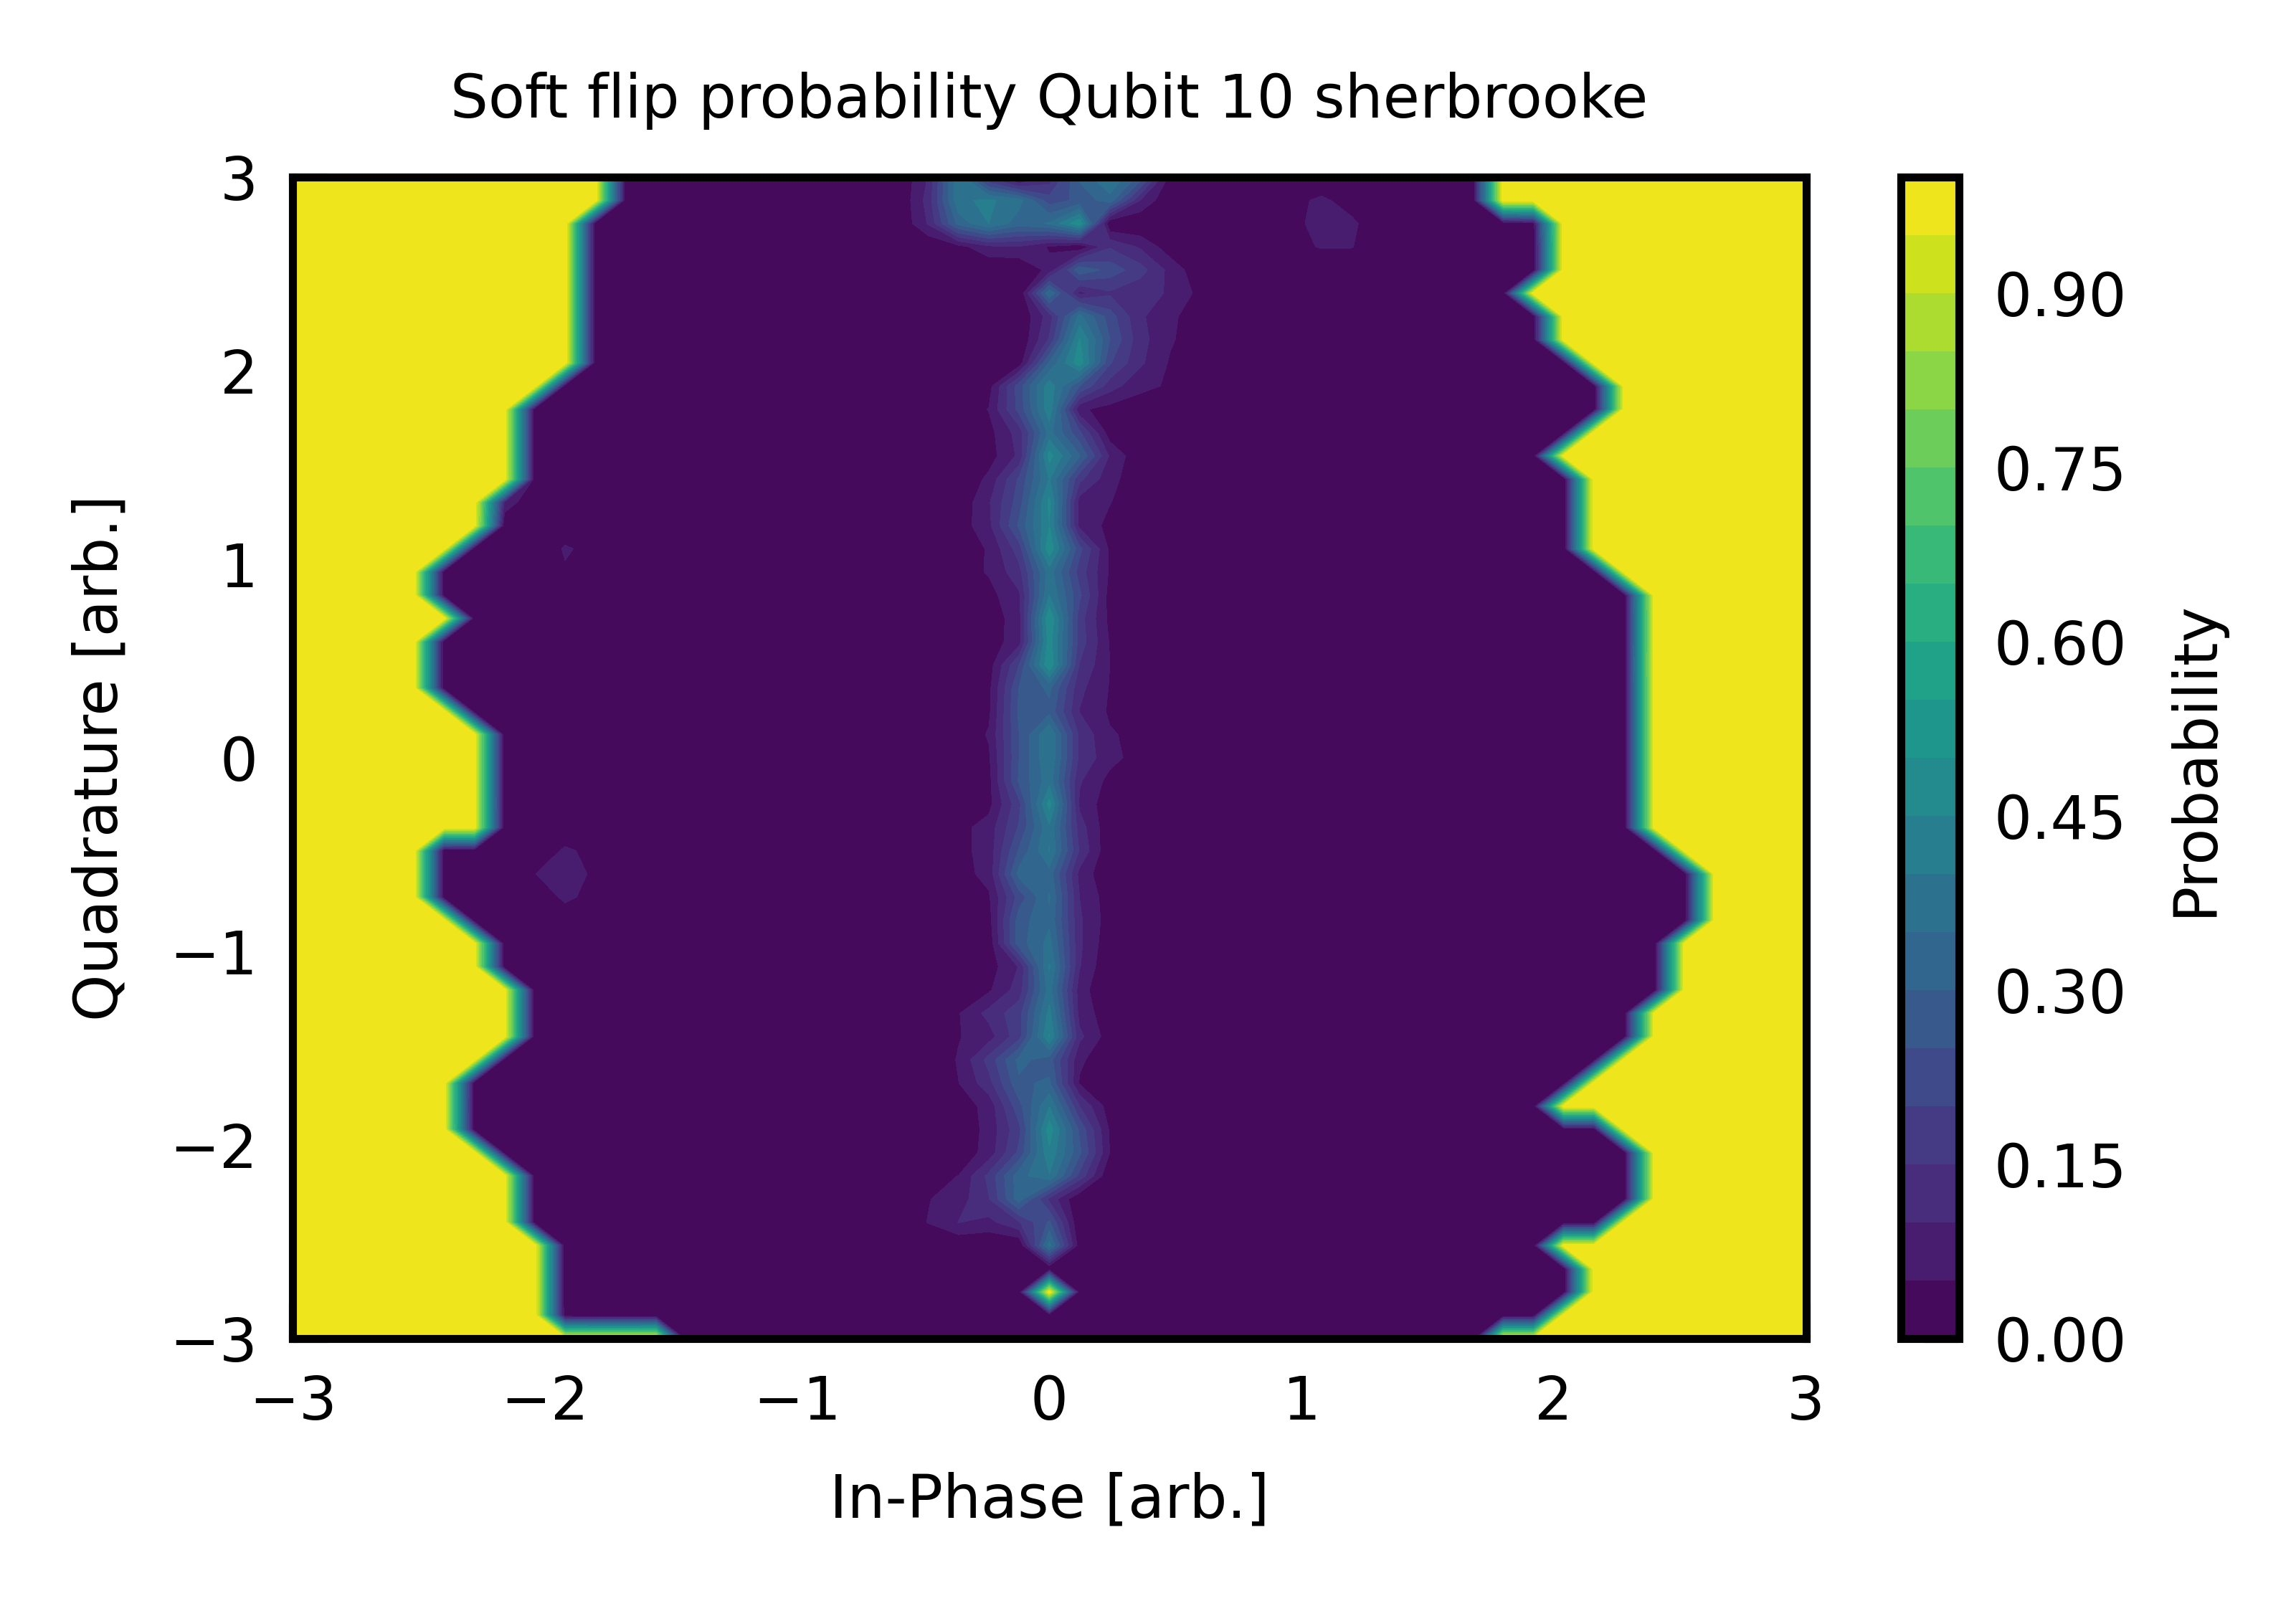

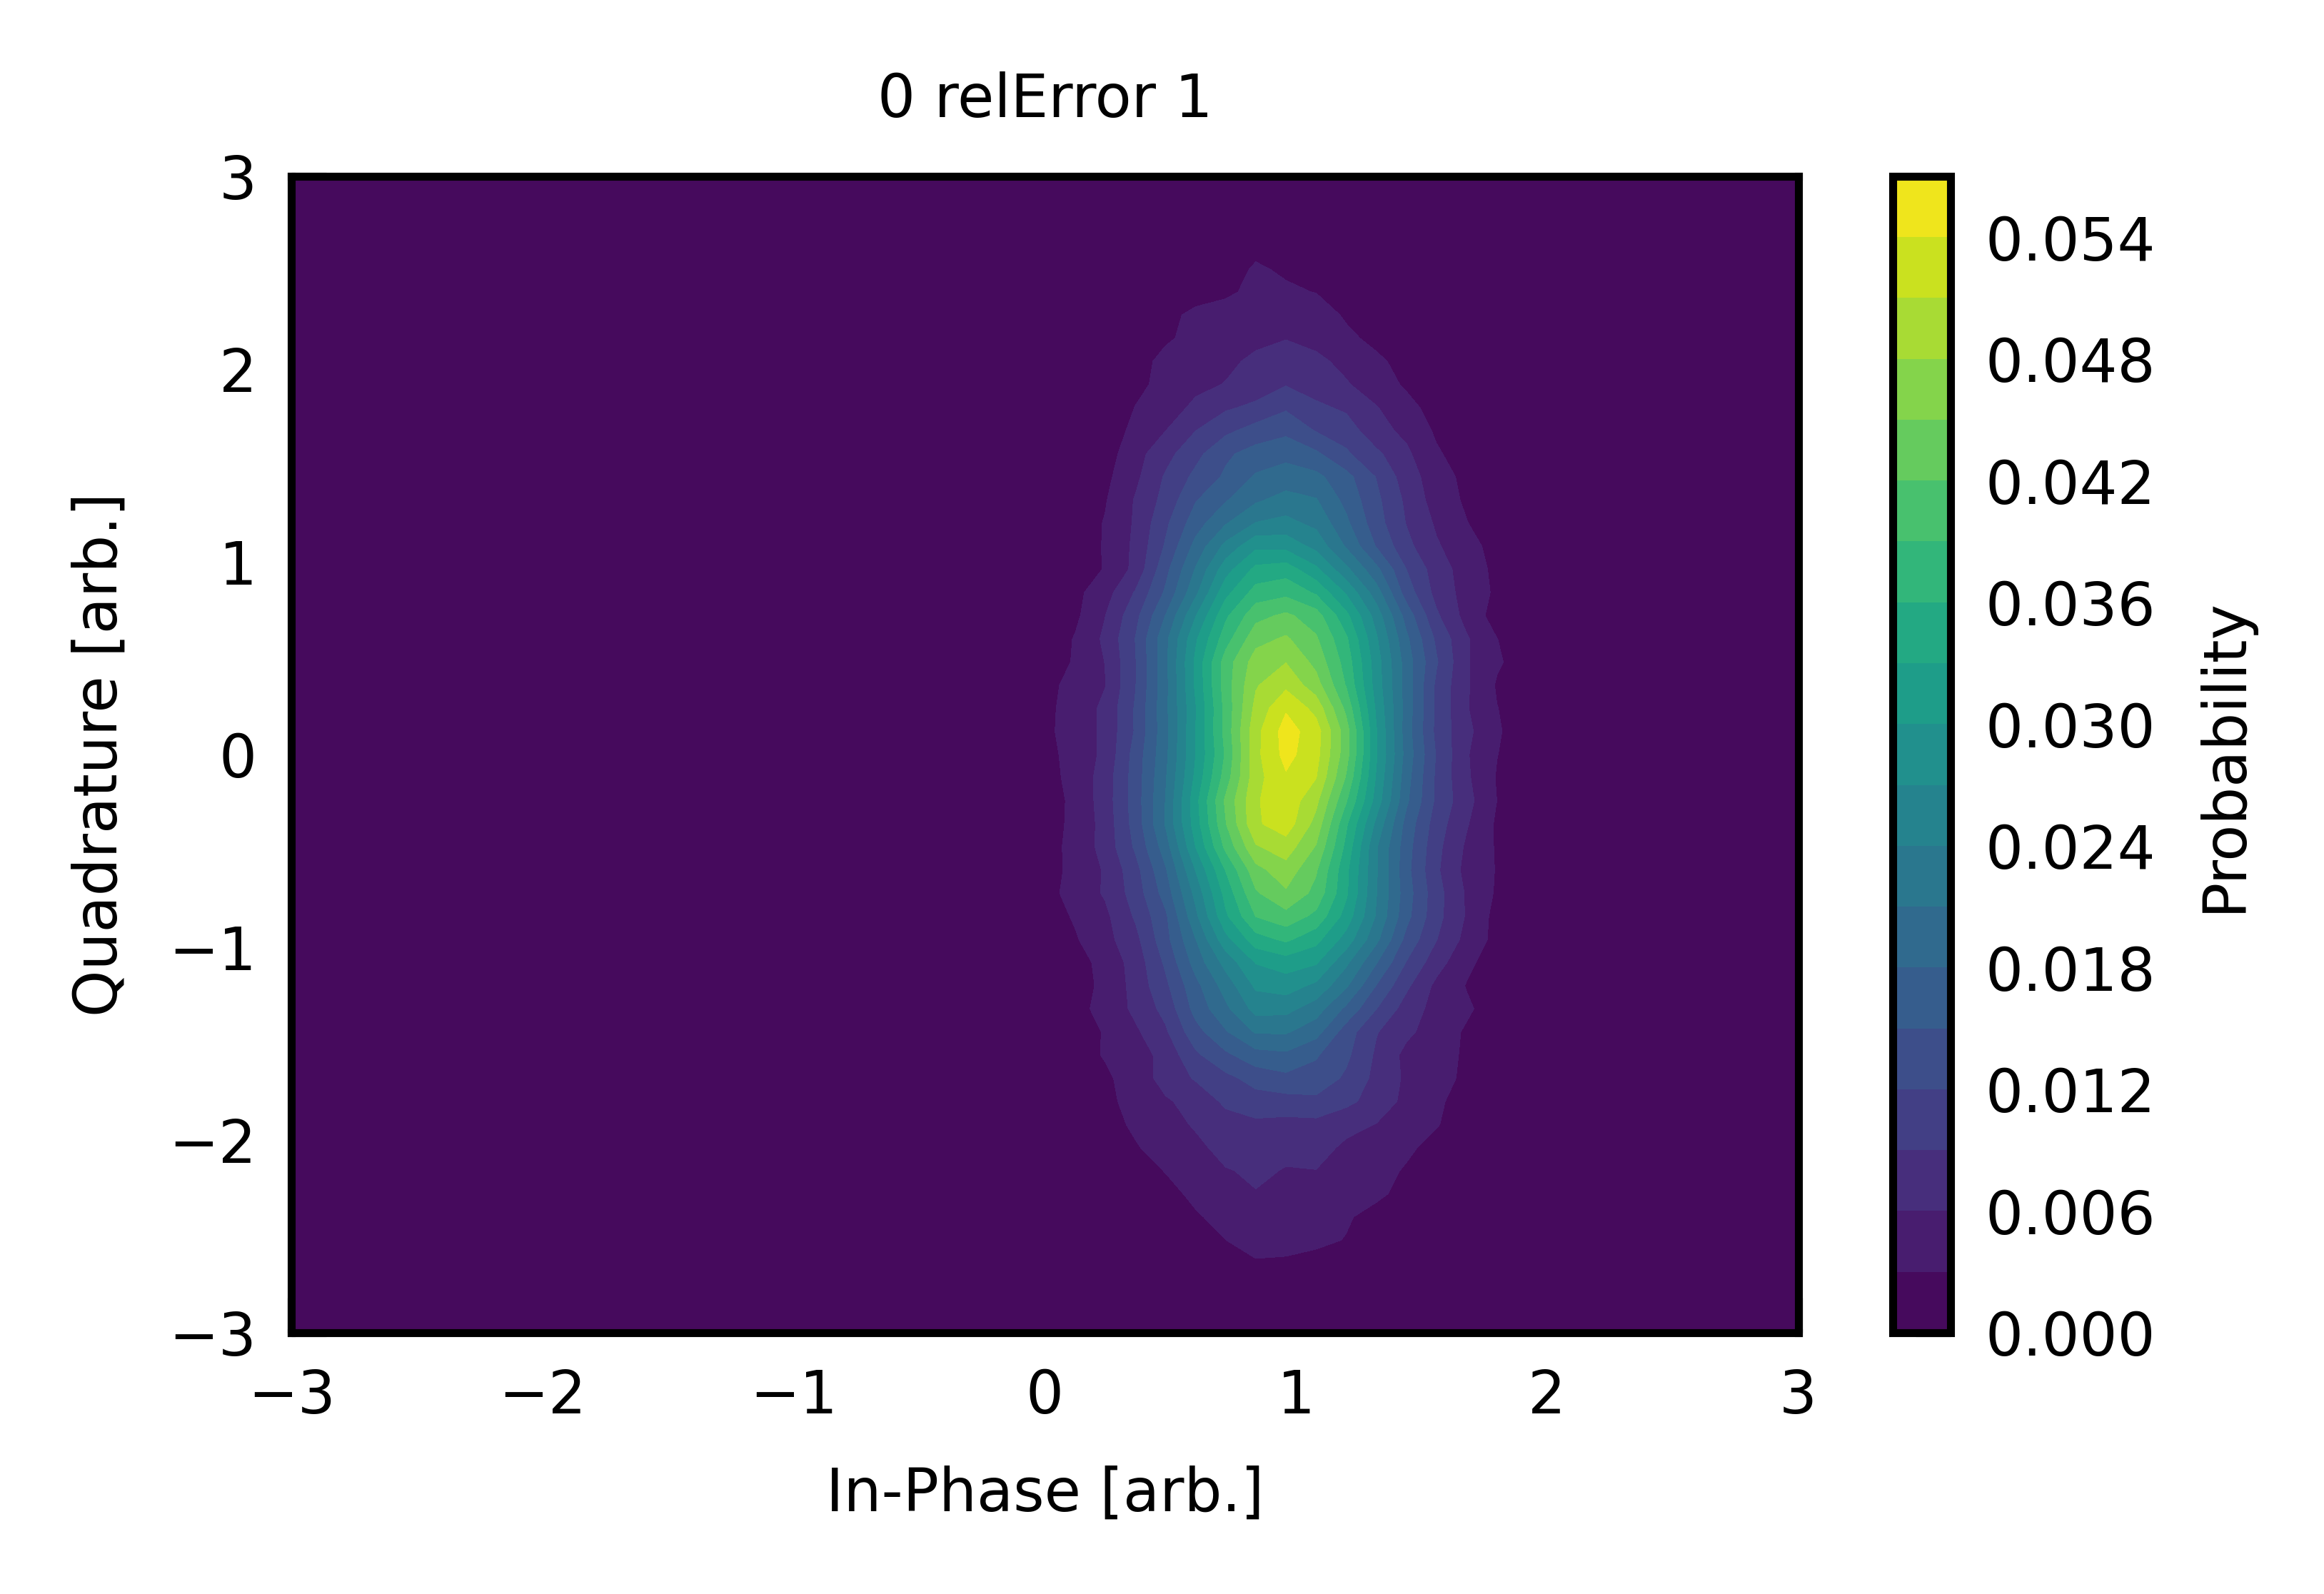

In [38]:
def plot_density_contour(density, qubit_idx, state, num_points, num_std, levels=20):
    FIGURE_WIDTH_1COL = 3.404  # For PRX style, change for according to journal
    FIGURE_WIDTH_2COL = 7.057  # For PRX style, change for according to journal
    FIGURE_HEIGHT_1COL_GR = FIGURE_WIDTH_1COL*2/(1 + np.sqrt(5))
    FIGURE_HEIGHT_2COL_GR = FIGURE_WIDTH_2COL*2/(1 + np.sqrt(5))

    font_size = 6 # For PRX style, change for according to journal

    plt.rcParams.update({
        'font.size'           : font_size,  
        'figure.titlesize'    : 'medium',
        'figure.dpi'          : 1000,
        'figure.figsize'      : (FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR),
        'axes.titlesize'      : 'medium',
        'axes.axisbelow'      : True,
        'xtick.direction'     : 'in',
        'xtick.labelsize'     : 'small',
        'ytick.direction'     : 'in',
        'ytick.labelsize'     : 'small',
        'image.interpolation' : 'none',
        'legend.fontsize'     : font_size,
        'axes.labelsize'      : font_size,
        'axes.titlesize'      : font_size,
        'xtick.labelsize'     : font_size,
        'ytick.labelsize'     : font_size,
    })


    plt.rcParams.update({'font.family':'sans-serif'})

    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.figure()
    plt.contourf(X, Y, density_reshaped, levels=levels, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Probability')
    plt.title(state)
    plt.xlabel('In-Phase [arb.]')
    plt.ylabel('Quadrature [arb.]')
    plt.show()

qubit = 10
logical = 1

density_relError_1 = grid_dict_relErr_1[qubit][logical]
# density_relError_none = grid_dict_relErr_None[qubit][logical]


L_relErr_1 =[]
for d1, d0 in zip(grid_dict_relErr_1[qubit][1], grid_dict_relErr_1[qubit][0]):
    L_relErr_1.append(-np.log(min(d1, d0)/(max(d1, d0)+1e-8)+1e-8))
L_relErr_1 = np.array(L_relErr_1)

# L_relErr_none =[]
# for d1, d0 in zip(grid_dict_relErr_None[qubit][1], grid_dict_relErr_None[qubit][0]):
#     L_relErr_none.append(-np.log(min(d1, d0)/(max(d1, d0)+1e-8)+1e-8))
# L_relErr_none = np.array(L_relErr_none)
# L_relErr_1 = grid_dict_relErr_1[qubit][1]/(grid_dict_relErr_1[qubit][0]+1e-8)
# L_relErr_none = grid_dict_relErr_None[qubit][1]/(grid_dict_relErr_None[qubit][0]+1e-8)

L_relErr_1 =[]
for d1, d0 in zip(grid_dict_relErr_1[qubit][1], grid_dict_relErr_1[qubit][0]):
    p_soft = 1 / ( 1 + max(d1, d0)/(min(d1, d0)+1e-8))
    L_relErr_1.append(p_soft)
L_relErr_1 = np.array(L_relErr_1)

# L_relErr_none =[]
# for d1, d0 in zip(grid_dict_relErr_None[qubit][1], grid_dict_relErr_None[qubit][0]):
#     p_soft = 1 / ( 1 + max(d1, d0)/(min(d1, d0)+1e-8))
#     L_relErr_none.append(p_soft)
# L_relErr_none = np.array(L_relErr_none)


plot_density_contour(L_relErr_1, qubit, state=f'Soft flip probability Qubit {qubit} sherbrooke', num_points=num_points, num_std=num_std, levels=20)
# plot_density_contour(L_relErr_none, qubit, state='p_soft relError = None', num_points=num_points, num_std=num_std, levels=20)

# plot_density_contour((L_relErr_1-L_relErr_none), qubit, state='absolute error between p_softs', num_points=num_points, num_std=num_std)
# plot_density_contour((L_relErr_1-L_relErr_none)/(L_relErr_1/2+L_relErr_none/2 + 1e-8), qubit, state='relativ error between p_softs', num_points=num_points, num_std=num_std)





plot_density_contour(density_relError_1, qubit, state='0 relError 1', num_points=num_points, num_std=num_std)
# plot_density_contour(density_relError_none, qubit, state='0 relError None', num_points=num_points, num_std=num_std)
# plot_density_contour((density_relError_1-density_relError_none)/(density_relError_1/2 + density_relError_none/2+1e-8), qubit, state='relative diff', num_points=num_points, num_std=num_std)


# Compare with python

In [ ]:
from Scratch import create_or_load_kde_grid

grid = create_or_load_kde_grid(provider, tobecalib_backend="ibm_sherbrooke", other_date="2021-10-30", num_grid_points=num_points, num_std_dev=num_std)

In [ ]:
def plot_density_contour(density, qubit_idx, num_points, num_std):
    # density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density, levels=20, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State 0 Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [ ]:
qubit = 120

density_0_py = np.exp(grid[0][qubit].grid_density_0)

density_0_cpp = grid_dict[qubit][0]
density_0_cpp = np.reshape(density_0_cpp, (num_points, num_points)).transpose()

print(density_0_cpp.shape)
print(density_0_py.shape)


density_diff = density_0_cpp - density_0_py

plot_density_contour(density_0_cpp, qubit, num_points=num_points, num_std=num_std)
plot_density_contour(density_0_py, qubit, num_points=num_points, num_std=num_std)
plot_density_contour(density_diff, qubit, num_points=num_points, num_std=num_std)


# Speed with other function

In [ ]:
from Scratch import create_or_load_kde_grid


grid_dict_s = create_or_load_kde_grid(provider, tobecalib_backend="ibm_sherbrooke", num_grid_points=num_points, num_std_dev=num_std, other_date='2021-10-30')